In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("Desktop/SimplifiedData.csv")

In [3]:
data.head()

,ImagePath,PatientID,Date,Time,Gender,Age,Comorbidity,Category,SpO2/time,OldScoring,Lt Total,Rt Total,Total Score,Unnamed: 13
0,Data/IMAGE/SIHRC00/1.2.392.200046.100.14.59355...,SUHRC,4/29/20,163637.610,F,18.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Data/IMAGE/SUHRC/1.2.392.200036.9125.2.1491341...,SUHRC,4/27/20,120020.937,M,45.0,NaN,P,NaN,False,12.0,10.0,22.0,NaN
2,Data/IMAGE/SUHRC/1.2.392.200036.9125.2.1491341...,SUHRC,4/27/20,120630.156,F,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,NaN
3,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120311.521,M,28.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120914.060,M,25.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
raw_data = data

In [5]:
print(len(data))
data.isnull().sum()

351


ImagePath        0
PatientID        0
Date             0
Time             0
Gender           5
Age              9
Comorbidity    335
Category       267
SpO2/time      289
OldScoring     241
Lt Total       243
Rt Total       243
Total Score    241
Unnamed: 13    351
dtype: int64

In [6]:
data = data.iloc[:,4:13]

In [7]:
data.head()

,Gender,Age,Comorbidity,Category,SpO2/time,OldScoring,Lt Total,Rt Total,Total Score
0,F,18.0,NaN,N,NaN,NaN,NaN,NaN,NaN
1,M,45.0,NaN,P,NaN,False,12.0,10.0,22.0
2,F,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN
3,M,28.0,NaN,N,NaN,NaN,NaN,NaN,NaN
4,M,25.0,NaN,N,NaN,NaN,NaN,NaN,NaN


In [8]:

data = data.drop(["Comorbidity","Category","OldScoring"],axis = 1)

In [9]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score
0,F,18.0,NaN,NaN,NaN,NaN
1,M,45.0,NaN,12.0,10.0,22.0
2,F,NaN,NaN,NaN,NaN,NaN
3,M,28.0,NaN,NaN,NaN,NaN
4,M,25.0,NaN,NaN,NaN,NaN


In [10]:
data.isnull().sum()

Gender           5
Age              9
SpO2/time      289
Lt Total       243
Rt Total       243
Total Score    241
dtype: int64

In [11]:
data = data.dropna(subset=["Age", "Gender"])
data = data.fillna(data.mean())

In [12]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score
0,F,18.0,95.311475,6.019231,6.230769,12.801887
1,M,45.0,95.311475,12.000000,10.000000,22.000000
3,M,28.0,95.311475,6.019231,6.230769,12.801887
4,M,25.0,95.311475,6.019231,6.230769,12.801887
5,M,30.0,95.311475,6.000000,6.000000,12.000000


In [13]:
encoder = LabelEncoder()
data["Gender"] = encoder.fit_transform(data["Gender"])

In [14]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score
0,0,18.0,95.311475,6.019231,6.230769,12.801887
1,1,45.0,95.311475,12.000000,10.000000,22.000000
3,1,28.0,95.311475,6.019231,6.230769,12.801887
4,1,25.0,95.311475,6.019231,6.230769,12.801887
5,1,30.0,95.311475,6.000000,6.000000,12.000000


In [15]:
sr = []
for i in range(len(data)):
    sr.append(i)

In [16]:
data["Sr"] = sr

In [17]:
data

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score,Sr
0,0,18.0,95.311475,6.019231,6.230769,12.801887,0
1,1,45.0,95.311475,12.000000,10.000000,22.000000,1
3,1,28.0,95.311475,6.019231,6.230769,12.801887,2
4,1,25.0,95.311475,6.019231,6.230769,12.801887,3
5,1,30.0,95.311475,6.000000,6.000000,12.000000,4
...,...,...,...,...,...,...,...
346,1,75.0,95.311475,6.019231,6.230769,12.801887,332
347,1,75.0,95.311475,6.019231,6.230769,12.801887,333
348,1,75.0,95.311475,6.019231,6.230769,12.801887,334
349,1,75.0,95.311475,6.019231,6.230769,12.801887,335


In [18]:
data = data.set_index("Sr")

In [19]:
data = pd.DataFrame(data, dtype=int)

In [20]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score
Sr,,,,,,
0,0,18,95,6,6,12
1,1,45,95,12,10,22
2,1,28,95,6,6,12
3,1,25,95,6,6,12
4,1,30,95,6,6,12


In [21]:
category = []
for i in range(len(data)):
    if(data["Total Score"][i] <= 12):
        category.append("Mild")
    elif(data["Total Score"][i] > 12 and data["Total Score"][i] <= 20):
        category.append("Moderate")
    elif(data["Total Score"][i] > 20):
        category.append("Severe")
    else:
        category.append(None)

In [22]:
data["Status"] = category

In [23]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score,Status
Sr,,,,,,,
0,0,18,95,6,6,12,Mild
1,1,45,95,12,10,22,Severe
2,1,28,95,6,6,12,Mild
3,1,25,95,6,6,12,Mild
4,1,30,95,6,6,12,Mild


In [24]:
Mild = data.loc[data["Status"] == "Mild"]
Moderate = data.loc[data["Status"] == "Moderate"]
Sever = data.loc[data["Status"] == "Severe"]

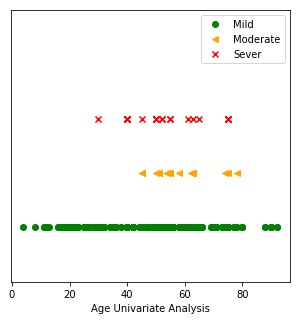

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(Mild["Age"], np.ones(len(Mild))*1, marker = "o", color = "green", label = "Mild")
plt.scatter(Moderate["Age"], np.ones(len(Moderate))*2, marker = "<", color = "orange" , label = "Moderate")
plt.scatter(Sever["Age"], np.ones(len(Sever))*3, marker = "x", color = "red", label = "Sever")
plt.xlabel("Age Univariate Analysis")
plt.yticks([])
plt.ylim(0,5)
plt.legend()

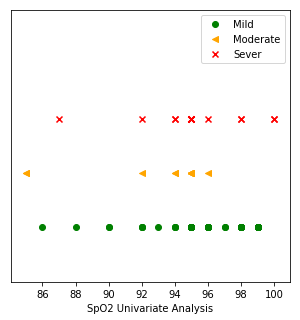

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(Mild["SpO2/time"], np.ones(len(Mild))*1, marker = "o", color = "green", label = "Mild")
plt.scatter(Moderate["SpO2/time"], np.ones(len(Moderate))*2, marker = "<", color = "orange" , label = "Moderate")
plt.scatter(Sever["SpO2/time"], np.ones(len(Sever))*3, marker = "x", color = "red", label = "Sever")
plt.xlabel("SpO2 Univariate Analysis")
plt.yticks([])
plt.ylim(0,5)
plt.legend()

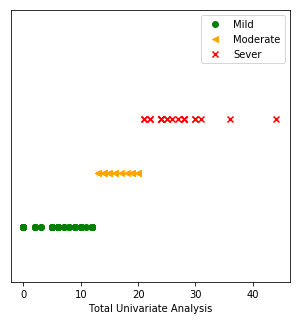

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(Mild["Total Score"], np.ones(len(Mild))*1, marker = "o", color = "green", label = "Mild")
plt.scatter(Moderate["Total Score"], np.ones(len(Moderate))*2, marker = "<", color = "orange" , label = "Moderate")
plt.scatter(Sever["Total Score"], np.ones(len(Sever))*3, marker = "x", color = "red", label = "Sever")
plt.xlabel("Total Univariate Analysis")
plt.yticks([])
plt.ylim(0,5)
plt.legend()

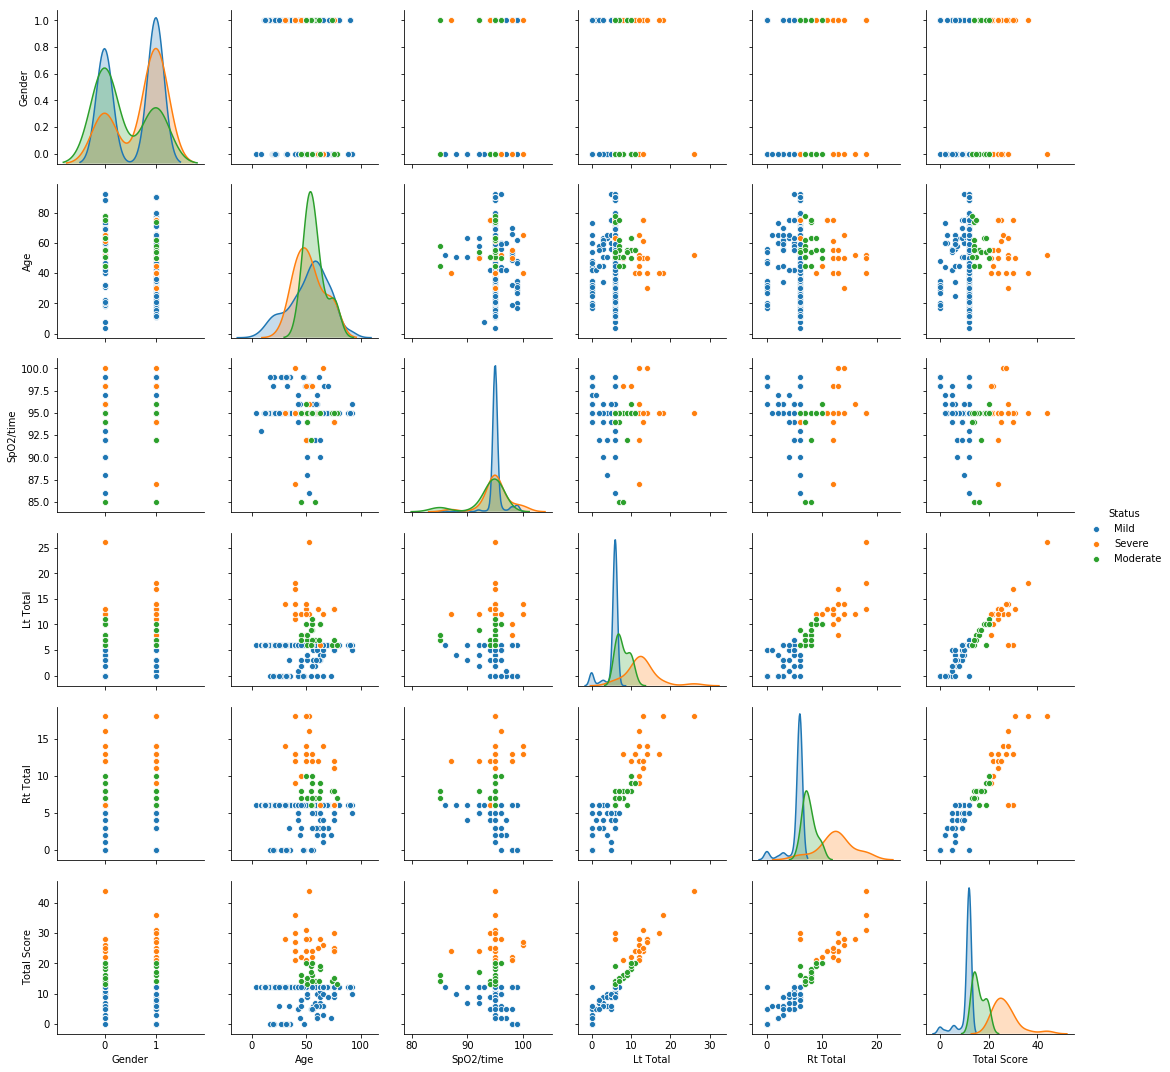

In [28]:
sns.pairplot(data, hue = "Status")

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
data.head()

,Gender,Age,SpO2/time,Lt Total,Rt Total,Total Score,Status
Sr,,,,,,,
0,0,18,95,6,6,12,Mild
1,1,45,95,12,10,22,Severe
2,1,28,95,6,6,12,Mild
3,1,25,95,6,6,12,Mild
4,1,30,95,6,6,12,Mild


In [31]:
X = data.iloc[:,0:6]

In [32]:
y = data.iloc[:,6:7].values

In [33]:
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [34]:
forest = RandomForestClassifier()

In [35]:
forest.fit(X,y)

RandomForestClassifier()

In [36]:
important = forest.feature_importances_

In [37]:
important

array([0.00795815, 0.02221104, 0.0222081 , 0.20719955, 0.27894396,
       0.4614792 ])

In [38]:
indices = np.argsort(important)[::-1]

In [39]:
indices

array([5, 4, 3, 1, 2, 0])

In [40]:
features = ["Gender","Age", "SpO2/time","Lt Total", "Rt Total", "Total Score"]

In [41]:
important_features = []
value = []
for i in range(len(features)):
    important_features.append(features[indices[i]])
    value.append(important[indices[i]]*100)

In [42]:
print(important_features)
print(value)

['Total Score', 'Rt Total', 'Lt Total', 'Age', 'SpO2/time', 'Gender']
[46.14791972595063, 27.894396121418303, 20.71995470001778, 2.2211041990769367, 2.220810311238224, 0.7958149422981261]


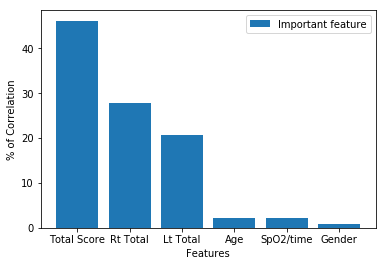

In [43]:
plt.bar(important_features, value, label = "Important feature")
plt.xlabel("Features")
plt.ylabel("% of Correlation")
plt.legend()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [47]:
lr.score(X_test, y_test)

0.9882352941176471

In [48]:
cv = KFold(n_splits=10,random_state=1)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [49]:
scores = cross_val_score(lr,X_test, y_test, cv=10)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase th

In [50]:
print("The accuracy of Logistic Regression = ",scores.mean())

The accuracy of Logistic Regression =  0.9527777777777778


In [51]:
print("The accuracy of all sets in Logistic Regression = ")
print(scores)

The accuracy of all sets in Logistic Regression = 
[1.         1.         1.         1.         0.77777778 0.875
 1.         0.875      1.         1.        ]


In [52]:
forest_lr = RandomForestClassifier()

In [53]:
forest_lr.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
forest_score = cross_val_score(forest_lr, X_test, y_test,cv=10)

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [55]:
print("The accuracy of Random Forest = ",forest_score.mean())

The accuracy of Random Forest =  0.9875


In [56]:
print("The accuracy of all sets of Logistic Regression = ")
print(forest_score)

The accuracy of all sets of Logistic Regression = 
[1.    1.    1.    1.    1.    0.875 1.    1.    1.    1.   ]


In [57]:
lr

LogisticRegression()

In [93]:
import pickle
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
import cv2
import os
from keras.utils import np_utils

In [59]:
pickle.dump(lr,open("Desktop/Vulnerablity_Classification_lr.model","wb"))

In [60]:
data = raw_data.dropna(subset=["Age", "Gender"])

In [61]:
data.head()

,ImagePath,PatientID,Date,Time,Gender,Age,Comorbidity,Category,SpO2/time,OldScoring,Lt Total,Rt Total,Total Score,Unnamed: 13
0,Data/IMAGE/SIHRC00/1.2.392.200046.100.14.59355...,SUHRC,4/29/20,163637.610,F,18.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Data/IMAGE/SUHRC/1.2.392.200036.9125.2.1491341...,SUHRC,4/27/20,120020.937,M,45.0,NaN,P,NaN,False,12.0,10.0,22.0,NaN
3,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120311.521,M,28.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120914.060,M,25.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,121131.297,M,30.0,NaN,N,NaN,False,6.0,6.0,12.0,NaN


In [62]:
data["Sr"] = sr
data = data.set_index("Sr")

/Users/santoshsaxena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
data.head()

,ImagePath,PatientID,Date,Time,Gender,Age,Comorbidity,Category,SpO2/time,OldScoring,Lt Total,Rt Total,Total Score,Unnamed: 13
Sr,,,,,,,,,,,,,,
0,Data/IMAGE/SIHRC00/1.2.392.200046.100.14.59355...,SUHRC,4/29/20,163637.610,F,18.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,Data/IMAGE/SUHRC/1.2.392.200036.9125.2.1491341...,SUHRC,4/27/20,120020.937,M,45.0,NaN,P,NaN,False,12.0,10.0,22.0,NaN
2,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120311.521,M,28.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,120914.060,M,25.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,Data/IMAGE/SUHRC00/1.2.392.200036.9125.2.14913...,SUHRC,4/27/20,121131.297,M,30.0,NaN,N,NaN,False,6.0,6.0,12.0,NaN


In [64]:
path = data.iloc[:,0]

In [65]:
print(len(path))

337


In [66]:
print(len(y))

337


In [98]:
X_image = []
y_image = []
imdex = []
size = (96,96)

In [99]:
for i in range(len(path)):
    file = "Desktop/"+path[i]
    img_aval = os.path.isfile(file)
    if(img_aval):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, size)
        X_image.append(img)
        imdex.append(i)
        y_image.append(y[i])

In [96]:
print(len(X_image))
print(len(y_image))

45
45


In [105]:
for i in range(39):
    X_image.append(X_image[0])
    y_image.append(y_image[0])
    X_image.append(X_image[20])
    y_image.append(y_image[20])

In [106]:
len(X_image)

123

In [107]:
len(y_image)

123

In [110]:
X_image = shuffle(X_image,random_state = 7)
y_image = shuffle(y_image,random_state = 7)

In [111]:
X_image = np.array(X_image)
y_image = np.array(y_image)

In [120]:
y_image_onehot = np_utils.to_categorical(y_image,3)

In [112]:
vgg16 = VGG16(input_shape=(96,96,3), weights = "imagenet", include_top = False)

Instructions for updating:
Colocations handled automatically by placer.


In [113]:
for layer in vgg16.layers:
    layer.trainable = False

In [123]:
x = Flatten()(vgg16.output)
prediction = Dense(3, activation='softmax')(x)

In [124]:
model = Model(inputs=vgg16.input, outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

In [125]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [126]:
X_image_train,X_image_test, y_image_train,y_image_test = train_test_split(X_image, y_image_onehot,stratify = y_image)

In [128]:
history = model.fit(X_image_train,y_image_train,epochs=5 ,validation_data=(X_image_test, y_image_test))

Train on 92 samples, validate on 31 samples
Epoch 1/5
92/92 [==============================] - 11s 119ms/step - loss: 0.4560 - accuracy: 0.8804 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 2/5
92/92 [==============================] - 11s 120ms/step - loss: 0.1528 - accuracy: 0.9891 - val_loss: 4.1417e-06 - val_accuracy: 1.0000
Epoch 3/5
92/92 [==============================] - 11s 119ms/step - loss: 0.0259 - accuracy: 0.9891 - val_loss: 3.3648e-07 - val_accuracy: 1.0000
Epoch 4/5
92/92 [==============================] - 11s 119ms/step - loss: 7.0361e-07 - accuracy: 1.0000 - val_loss: 1.4613e-07 - val_accuracy: 1.0000
Epoch 5/5
92/92 [==============================] - 11s 120ms/step - loss: 1.1921e-07 - accuracy: 1.0000 - val_loss: 1.2113e-07 - val_accuracy: 1.0000


In [129]:
model.evaluate(X_image_test,y_image_test)

31/31 [==============================] - 3s 95ms/step


[1.2113201819374808e-07, 1.0]